<h1><center>Solving multi agent path finding problem instance using variational quantum eigensolver</center></h1>
<h4><center>November 2022</center></h4>

<h5><center>By: Hanna Keller</center></h5>
<h5><center>Supervised by: Prof. Tal Mor, Ms. Ittay Alfassi</center></h5>


# Abstract

In this work I will show how to solve a small multi agent path finding (MAPF) problem using quantum tools and platforms, by applying a chain of reductions from the MAPF problem to the minimal eigenvalue problem, which can be solved using a variational quantum eigensolver (VQE). 

# Reductions overview

**1. The MAPF instance:**


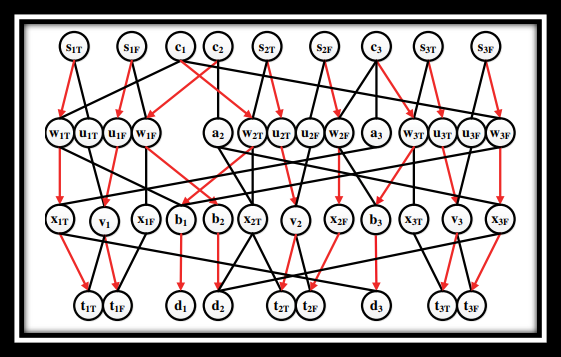

I will use the following reduction chain:

MAPF -> 3SAT -> Subset Sum -> Partitioning problem -> Minimum Eigenvalue problem

I will prove that if the MAPF instance below has a 3-move solution, the minimum eigenvalue calculated by the VQE will be 0.

**2. The Corresponding 3SAT problem:**

$(x_{1}\lor x_{2}\lor\lnot x_{3})\land(\lnot x_{1}\lor x_{2}\lor\lnot x_{3})\land(x_{1}\lor\lnot x_{2}\lor x_{3})$

**3. The Corresponding Subset Sum problem:**

Subset_set: [100101, 100010, 10110, 10101, 1001, 1110, 100, 100, 10, 10, 1, 1]

target = 111333

**4. The Corresponding Partitioning problem:**

Partitioning_set: [100101, 100010, 10110, 10101, 1001, 1110, 100, 100, 10, 10, 1, 1, 333977, 333988]

target = 445310

**5. Part of the Corresponding Hamiltonian (2^14 on 2^14 table):**

========== Ising Model Hamiltonian ==========

[[7.93203984e+11+0.j   0.00000000e+00+0.j 0.00000000e+00+0.j ...
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 4.95703507e+10+0.j 0.00000000e+00+0.j ...
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 4.95801476e+10+0.j ...
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 ...
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j ...
  4.95801476e+10+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j ...
  0.00000000e+00+0.j 4.95703507e+10+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j ...
  0.00000000e+00+0.j 0.00000000e+00+0.j 7.93203984e+11+0.j]]

**6. Minimal Eigenvalue calculated by VQE:**

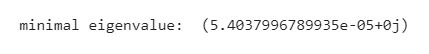

# Reductions proof

## MAPF - 3SAT

### MAPF

**Definition: MAPF (Multi-Agent Path Finding)** is an instance of multi-agent planning and consists in the computation of collision-free paths for a group of agents from their location to an assigned target. It is an optimization problem, since the aim is to find those paths that optimize a given objective function, usually defined as the number of time steps until all agents reach their goal cells.


A classical MAPF problem with k agents (Stern et al. 2019) is defined by a tuple $⟨G,s,t⟩$, where $G=(V,E)$ is an undirected  graph,

<h5><center>$s:[1,...,k]→V$ </center></h5>

maps an agent to its source vertex, and

<h5><center>$t:[1,...,k]→V$ </center></h5>

maps an agent to its target vertex. Each agent starts in its source vertex. In every time step, an agent either waits in its current  vertex or moves to one of  the  vertices  adjacent  to  it.

Another useful term to define is Makespan - the time in which the last package reaches its destination, therefore the makespan of a solution is    $max_{i}(T_{i}^{end})$.

For intuition sake, the MAPF instance is often illustrated as grid with moving symbols, who represent the agents.



#### <h5><center>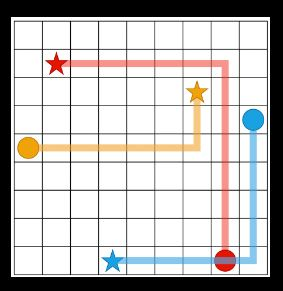

<h5><center>**Example of a MAPF problem** (By BenedettaFlam - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=119963249)

### 3SAT

**Definition: 3SAT** is the set of satisfiable boolean expressions that are expressed in 3CNF.
 For an expression to be in 3CNF form, it must satisfy two constraints:
1.	The expression is made up of ANDed together clauses, which themselves are made up of ORred together literals.
2.	Each clause contains at most 3 literals: there can be any number of clauses ANDed together, but there can only be one, two or three literals in each clause.
The decision question asks if the expression is satisfiable.


Example: 

<h5><center>$(x_{1}\lor x_{2}\lor\lnot x_{3})\land(\lnot x_{1}\lor x_{2}\lor\lnot x_{3})\land(x_{1}\lor\lnot x_{2}\lor x_{3})$

### Reduction

MAPF is a NP-hard problem [1], making it classically intractable for a large number of agents. There is reduction from the MAPF problem to the ≤3,=3SAT problem [2], which constructs a MAPF instance that has a solution with  makespan=3 if and only if a given 3-SAT instance is satisfiable.

For this work, I used the reduction described in [2], that takes the 3SAT formula described above and constructs a corresponding MAPF instance
(I added some demonstration of the reduction in the Git repository, at [MAPF/3SAT to MAPF reduction .pptx](https://github.com/hannak24/solving_the_partitioning_problem_with_variational_quantum_eigensolver/blob/main/MAPF/3SAT%20to%20MAPF%20reduction%20.pptx)). So we got:

**MAPF instance:**

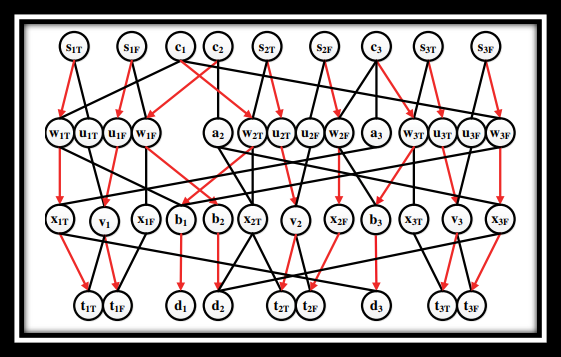

**Corresponding 3SAT problem:**

$(x_{1}\lor x_{2}\lor\lnot x_{3})\land(\lnot x_{1}\lor x_{2}\lor\lnot x_{3})\land(x_{1}\lor\lnot x_{2}\lor x_{3})$

## 3SAT - Subset Sum

### Subset Sum

**Definition:** Given a list of numbers and a target number t, is there a subset of the list that adds to exactly t? 

For example, the answer is yes for $⟨(3, 4, 12, 7, 4), 20⟩$ and no
for $⟨(3, 4, 12, 7, 4), 6⟩$. 



### Reduction

The Subset problem is NP-complete [5], [6], and an example of the reduction from the 3SAT problem to the Subset Sum problem is described below (the intuition behind the reduction is explained very well in [5], [6]).


**3SAT problem:**

$(x_{1}\lor x_{2}\lor\lnot x_{3})\land(\lnot x_{1}\lor x_{2}\lor\lnot x_{3})\land(x_{1}\lor\lnot x_{2}\lor x_{3})$

**Reduction table:**

variables|x1| x2 | x3| c1| c2 | c3
---------|:-|----|---|---|----|---------------
v1       |1 |  0 | 0 | 1 | 0  | 1  
v1'      |1 |  0 | 0 | 0 | 1  | 0
v2       |0 |  1 | 0 | 1 | 1  | 0                               
v2'      |0 |  1 | 0 | 0 | 0  | 1
v3       |0 |  0 | 1 | 0 | 0  | 1 
v3'      |0 |  0 | 1 | 1 | 1  | 0
s1       |0 |  0 | 0 | 1 | 0  | 0
s1'      |0 |  0 | 0 | 1 | 0  | 0
s2       |0 |  0 | 0 | 0 | 1  | 0
s2'      |0 |  0 | 0 | 0 | 1  | 0
s3       |0 |  0 | 0 | 0 | 0  | 1
s3'      |0 |  0 | 0 | 0 | 0  | 1
t        |1 |  1 | 1 | 3 | 3  | 3

**Corresponding Subset sum problem:**

Subset_set: [100101, 100010, 10110, 10101, 1001, 1110, 100, 100, 10, 10, 1, 1]

t = 111333

## Subset Sum - Partitioning problem

### Partitioning problem

**Definition:** Given a list of numbers $S$ , is there a subset of the numbers that adds to exactly Sum($S$)/2? 

For example, the answer is yes for $⟨(1, 1, 2)⟩$ and no
for $⟨(3, 1, 1)⟩$. 

This problem is known to be NP-complete [7].

### Reduction

Let $(S,t)$ be a Subset Sum problem, where $S$ is the set and $t$ the target value. We define $σ=∑_{s∈S}s$. 

Define the set $\tilde{S}=S⊔\{2σ-t,σ+t\}$ (which will be the partitioned set), note $Σ_{\tilde{s}∈\tilde{S}}\tilde{s}=4σ$.

We claim the partitioning problem $(\tilde{S},2σ)$ is equivalent to the subset sum $(S,t)$:

   
> ⇒ If there is a subset $S'⊆S$ s.t $\Sigma_{s\in{S'}}s=t$, then $S⊔\{2σ-t\}$ and $S⊔\{σ+t\}$ form a partition of $\tilde{S}$.

> ⇐ If $\tilde{S}$ can be partitioned into two parts whose sums equal $2σ$, then each contain only one element of $\{2σ-t,σ+t\}$ since $(2σ-t)+(σ+t)=3σ$. Denote the elements in the partition contaning $2σ-t$ (not including $2σ-t$) by $S'$. Their sum is $t$ and $S'⊆S$.





**In our case**, for the Subset Sum problem,

Subset_set: [100101, 100010, 10110, 10101, 1001, 1110, 100, 100, 10, 10, 1, 1]

$t = 111333$

$σ=Σ_{\tilde{S}}\tilde{s}=222655$ 

We will construct the corresponding Partitioning problem by adding the following numbers to the set,
 

$2σ-t$ = 333977

$σ+t$ = 333988

**Corresponding partitioning problem:**

Partitioning_set: [100101, 100010, 10110, 10101, 1001, 1110, 100, 100, 10, 10, 1, 1, 333977, 333988]

target = 445310

## Partitioning  - Minimal eigenvalue problem

### Minimal eigenvalue problem

**Definition**: given a matrix $M$, find the minimum eigenvalue of the matrix.

### Reduction:

There is a reduction between the partitioning problem and the Minimal eigenvalue problem [4]. 

The partitioning problem is formulated as an Ising Model, and its minimal energy (the minimal eigenvalue of the created Hamiltonian) is calculated using VQE. 

The minimal eigenvalue is zero ⇔ there is a solution to the partitioning problem. 

(My example of the reduction from a partitioning problem to a Minimal eigenvalue problem can be found in the Git repository, at [MAPF/creating_the_hamiltonian_of_number_partitioning_problem](https://github.com/hannak24/solving_the_partitioning_problem_with_variational_quantum_eigensolver/blob/main/MAPF/creating_the_hamiltonian_of_number_partitioning_problem.pdf)).

**Partitioning problem:**

Partitioning_set: [100101, 100010, 10110, 10101, 1001, 1110, 100, 100, 10, 10, 1, 1, 333977, 333988]

target = 445310

**Part of the corresponding hamiltonian (2^14 on 2^14 table):**

========== Ising Model Hamiltonian ==========

[[7.93203984e+11+0.j   0.00000000e+00+0.j 0.00000000e+00+0.j ...
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 4.95703507e+10+0.j 0.00000000e+00+0.j ...
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 4.95801476e+10+0.j ...
  0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 ...
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j ...
  4.95801476e+10+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j ...
  0.00000000e+00+0.j 4.95703507e+10+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j ...
  0.00000000e+00+0.j 0.00000000e+00+0.j 7.93203984e+11+0.j]]

 # Complexity

For what concerns classical bounded suboptimal solutions of the MAPF problem, it is shown that it is Np-hard to find a makespan-optimal solution with a factor of suboptimality smaller than 4/3 [2]. However, approximating the complexity of the solution presented in this project isn't straight forward.


This project is constructed from two parts: a chain of reductions from the MAPF problem to the eigenvalue problem and solution of the eigenvalue problem by the VQE algorithm.


The VQE algorithm uses both quantum methods and classical optimization algorithm to approximate the minimal eigenvalue of a given matrix. While the complexity of one quantum cycle is known (O(p-2) to obtain an estimate with precision p [3]), the number of iterations needed to converge to the minimal eigenvalue depends greatly on the matrix given, since the minimization algorithm can get stuck on a local minimum.


The reductions themselves take polynomial time but change the problem's appearance. For example, the reduction from the 3SAT problem to the subset sum problem, defines 2 numbers for each variable in the original problem and 2 numbers for each clause. Since the matrix solved in the last step with the VQE algorithm depends on the number of the variables in the set partitioning problem (if the size of the set of the set partitioning problem is n then the matrix representing the problem is of the size 2^n x 2^n), the addition of variables in every reduction can be significant for the complexity of the problem.  


# Code

In this section I will write code that will translate a solvable in 3 moves  MAPF instance to an Ising model, that can be solved using VQE.

## Imports

In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.8 MB 4.7 MB/s 
     |████████████████████████████████| 19.2 MB 20.5 MB/s 
     |████████████████████████████████| 240 kB 19.4 MB/s 
     |████████████████████████████████| 106 kB 60.0 MB/s 
     |████████████████████████████████| 55 kB 1.6 MB/s 
     |████████████████████████████████| 50 kB 3.1 MB/s 
     |████████████████████████████████| 37.5 MB 1.6 MB/s 
     |████████████████████████████████| 49 kB 2.1 MB/s 
     |████████████████████████████████| 943 kB 7.4 MB/s 
     |████████████████████████████████| 4.0 MB 23.4 MB/s 
     |████████████████████████████████| 1.9 MB 34.9 MB/s 
     |████████████████████████████████| 112 kB 47.9 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.3-py3-none-any.whl size=12262 sha256=6e8928ca896842fe9241574f7ac50204a6dc6c48590939db06f402944fffecaa
  Stored in directory: /root/.cache/pip/wheels/b1/36/b2/6eb4e

In [ ]:
from qiskit.algorithms import VQE
from qiskit import Aer, IBMQ
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.providers.aer.noise import NoiseModel
from qiskit.algorithms.optimizers import L_BFGS_B, COBYLA
from qiskit.tools.visualization import circuit_drawer
from qiskit.circuit.library import EfficientSU2  

seed = 9999
entanglement = "linear"
mapf_instance = []

## MAPF to 3SAT

In [ ]:
def print_3SAT(sat, row_num, col_num):
    print("SAT:", end = " " )
    for j in range(col_num):
        index = 0
        print("(",end = "")
        for i in range(row_num):
            if sat[i][j] == 1:
                index = i//2;
                print(f"x{index}", end = "")
                if(i%2 != 0):
                  print("_not", end = "")
                if(i != row_num-1):
                    print(" V ", end = "")
        print(")")
        print()



def MAPF_to_3SAT(MAPF):
  ## a generic code should be found (There are libraries in c++ that performs this complex conversion, but I didn't find one in python)
  sat = [
      [1],
      [0],
      [1],
      [0],
      [0],
      [1]
  ]
  var_num = 3
  clause_num = 1
  print_3SAT(sat, var_num * 2, clause_num)
  return sat, var_num, clause_num

## 3SAT to Subset Sum

In [ ]:
import numpy as np

sat = np.zeros((6 , 1))

def SAT_to_Subset_Sum(SAT = sat, num_of_vars = 2, num_of_clauses = 2):
  subsetSumSet = []
  target = 0
  rows_num = (num_of_vars * 2 + num_of_clauses * 2) + 1
  cols_num = num_of_vars + num_of_clauses
  mat = np.zeros((rows_num , cols_num))
  i = 0
  for j in range(cols_num):
      mat[i,j] = 1
      mat[i+1,j] = 1
      i += 2

  mat[rows_num - 1] = np.concatenate((np.full((1, num_of_vars), 1), np.full((1, num_of_clauses), 3)), axis=1)

  for i in range(num_of_vars * 2):
    for j in range(num_of_vars, cols_num):
      mat[i][j]= SAT[i][j-num_of_vars]

#   print("The reduction matrix equals to: ")
#   print(mat)
#   print("\n")

  
  for i in range(rows_num):
    num = 0
    for j in range(cols_num):
      num +=  mat[i][j] * pow(10,(cols_num - 1 - j))
    if( i != rows_num - 1):
      subsetSumSet.append(num)
    else:
      target = num
  print("Subset Sum Set: ", subsetSumSet)
  print("Subset Sum target: ", target)
  print("\n")
  return subsetSumSet, target

## Subset Sum to Partitioning problem

In [ ]:
def subset_sum_to_partitioning_problem(SubsetSumSet, t):
  subsetSum = sum(SubsetSumSet)
  new1 = 2 * subsetSum - t
  new2 = subsetSum + t
  partitioningSet = SubsetSumSet
  partitioningSet.append(new1)
  partitioningSet.append(new2)
  print("Partitioning Set: ", partitioningSet)
  print("\n")
  return partitioningSet

## Partitioning problem to Ising Model

In [ ]:
import numpy as np
from qiskit.opflow import Z, I

def create_general_hamiltonian(S,doPrint=0):
  num_qubits = len(S)
  sum = 0
  sigmas_list = []
  for qubit in range(num_qubits):
    if qubit == 0:
       sigma = Z
    else:
       sigma = I
    for i in range(1,num_qubits):
      if i == qubit:
        sigma = sigma^Z
      else:
        sigma = sigma^I
    sigmas_list.append(sigma)  

  for i in range(len(sigmas_list)):
    for j in range(len(sigmas_list)):
      sum += S[i]*S[j]* sigmas_list[i]@sigmas_list[j]
  if doPrint:
    print("========== Ising Model Hamiltonian ==========\n")
    #format(sum.to_matrix(),".3f")
    print(sum.to_matrix())
    print()
  return sum

## VQE  Solution

## preparing the simulator

In [ ]:
def prepare_simulator(simulator_name, optimizer_name, seed, shots=8192):
    algorithm_globals.random_seed = seed
    backend = Aer.get_backend(simulator_name)
    quantum_instance = QuantumInstance(backend=backend, 
                                      shots=shots, 
                                      seed_transpiler=seed, 
                                      seed_simulator=seed
                                      )
    if optimizer_name == "cobyla" or optimizer_name == "COBYLA":
      optimizer = COBYLA(maxiter=60)
    else:
      optimizer = L_BFGS_B(maxiter=60)
    return optimizer, quantum_instance

## compute minimal eigenvalue

In [ ]:
from qiskit.circuit.library import EfficientSU2

def minimum_eigenvalue_by_vqe(num_qubits, ansatz_entanglement, optimizer, quantum_instance, hamiltonian,doPrint=0):
    ansatz = EfficientSU2(num_qubits=num_qubits, entanglement=entanglement)
    #ansatz.draw(output='latex', scale=0.5)
    vqe = VQE(ansatz, optimizer, quantum_instance=quantum_instance)
    result = vqe.compute_minimum_eigenvalue(hamiltonian)
    if doPrint:
      print("minimal eigenvalue: ", format(result.eigenvalue,".3f"))
    return result.eigenvalue

In [ ]:
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B, SLSQP
import pylab

def evaluation_count(simulator_name, optimizer_name, H,num_qubits, printGraph=False):
    converge_cnts = np.empty([1], dtype=object)
    converge_vals = np.empty([1], dtype=object)
    algorithm_globals.random_seed = 50
    counts = []
    values = []

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)

    optimizer, quantum_instance = prepare_simulator(simulator_name, optimizer_name, seed) 
    ansatz = EfficientSU2(num_qubits=num_qubits, entanglement=entanglement)
    vqe = VQE(ansatz, optimizer, callback=store_intermediate_result,
                quantum_instance=QuantumInstance(backend=Aer.get_backend('statevector_simulator')))
    result = vqe.compute_minimum_eigenvalue(operator=H)
    converge_cnts[0] = np.asarray(counts)
    converge_vals[0] = np.asarray(values)
    print("minimum eigenvalue: ", result.eigenvalue)
    if(printGraph):
        pylab.rcParams['figure.figsize'] = (12, 8)
        pylab.plot(converge_cnts[0], converge_vals[0], label=type(optimizer).__name__)
        pylab.xlabel('Eval count')
        pylab.ylabel('Energy')
        pylab.title('Energy convergence - evaluation count')
        pylab.legend(loc='upper right');

    return result.eigenvalue

## run VQE

In [ ]:
import itertools
import numpy as np
def find_best_permutation(qubit_num, optimizer, quantum_instance, partitioning_problem, doPrint = False, permute = False):
  if(permute):
    permutations = list(itertools.permutations(partitioning_problem))
    min = 100000
    min_per = []
    for per in permutations:
      np.array(per)
      H = create_general_hamiltonian(per)
      bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed) 
      result = minimum_eigenvalue_by_vqe(10, entanglement, bfgs_optimizer, quantum_instance, H)
      if(doPrint):
        print("minimal eigenvalue: ", result)
      if (min>result):
          min = result
          min_per = per
          print(min, min_per)
    print("final results")
    print(min, min_per)
    return min, min_per
  else:
    return 5.4037996789935e-05+0j, [1001, 1000, 101, 10, 100, 3338, 1, 11, 1, 3337]


In [ ]:
def compute_eigenvalue_with_VQE(partitioning_problem, qubit_num):
  H = create_general_hamiltonian(partitioning_problem)
#   bfgs_optimizer, quantum_instance = prepare_simulator("aer_simulator_statevector", "bfgs", seed)
#   result, permutation = find_best_permutation(qubit_num, bfgs_optimizer, quantum_instance, partitioning_problem) 
  #result = minimum_eigenvalue_by_vqe(qubit_num, "linear", bfgs_optimizer, quantum_instance, H)
  result = evaluation_count("aer_simulator_statevector","bfgs",H, qubit_num, printGraph=True)
  return result

# Putting it all together

In [ ]:
def from_mapf_to_vqe_solution(MAPF):
  sat, num_of_vars, num_of_clauses  = MAPF_to_3SAT(MAPF)
  subset_sum_set, t = SAT_to_Subset_Sum(sat, num_of_vars, num_of_clauses)
  partitioining_set = subset_sum_to_partitioning_problem(subset_sum_set, t)
  minimum_eigenvalue = compute_eigenvalue_with_VQE([1001, 1000, 101, 10, 100, 3338, 1, 11, 1, 3337], len(partitioining_set))


# Run Test

To test the implementation, I will run my functions on a relatively small MAPF instance with 7 agents: 

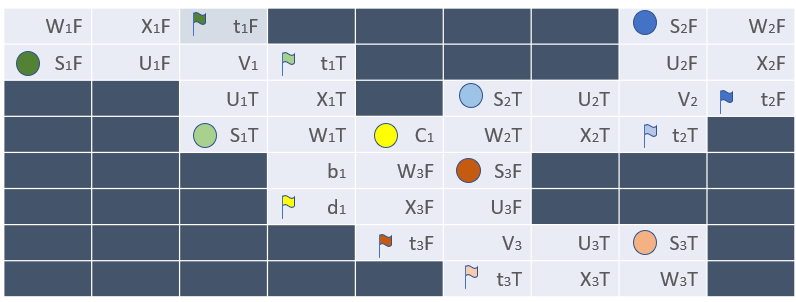

In this illustration, each circle represents an agent that stands on its initial position. The flags (with the similiar colors) represent the destinations of the agents. The letters and numbers are indexes of the cells in the grid, provided to help linking the instance to its SAT reduction.

  In each time step, an agent can either move to the cell next to it, or wait in its current place. 

Constraints:


1.   Agents can't move to a dark cell.
2.   Agents can't collide (move to the same cell at the same time, or swap positions).



I will show that the instance above has a valid 3-step solution (all the agents are in their destination cells after 3 time steps):

**step 1:**


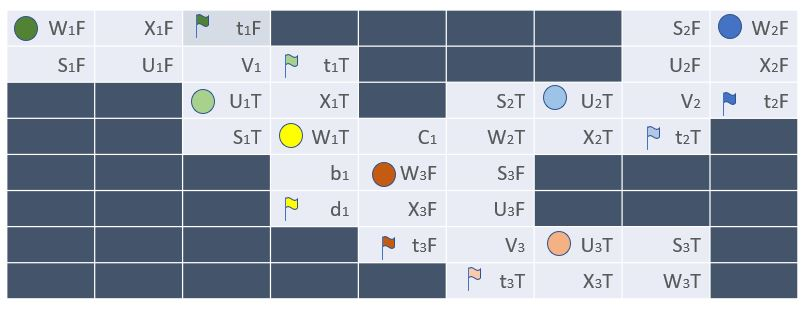


**step 2:**



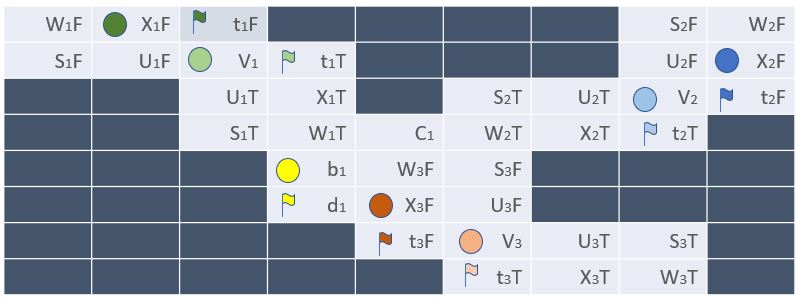

**step 3:**



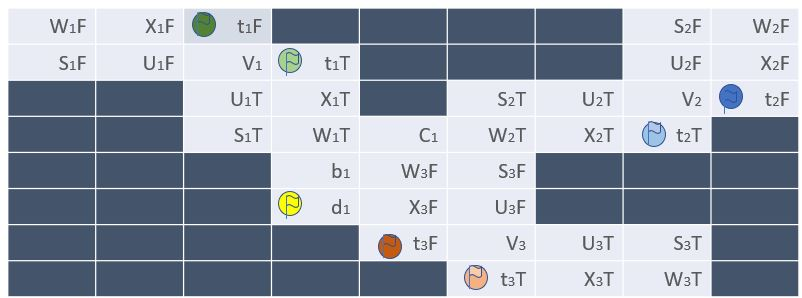

I showed that the instance above has a 3-step solution, therefore I expect to get (after the reductions chain) minimum eigenvalue that equals to 0.

## Code

SAT: (x0 V x1 V x2_not)

Subset Sum Set:  [1001.0, 1000.0, 101.0, 100.0, 10.0, 11.0, 1.0, 1.0]
Subset Sum target:  1113.0


Partitioning Set:  [1001.0, 1000.0, 101.0, 100.0, 10.0, 11.0, 1.0, 1.0, 3337.0, 3338.0]


minimum eigenvalue:  (5.4037996789935e-05+0j)


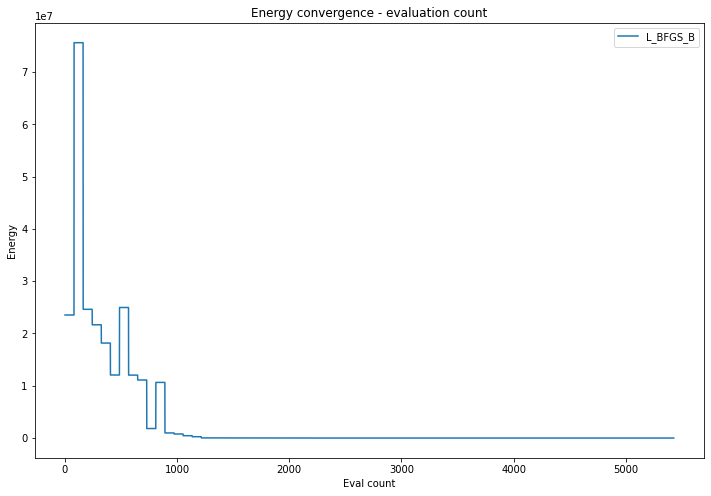

In [ ]:
from_mapf_to_vqe_solution(mapf_instance)

# Results

I took a MAPF problem instance that contained 7 agents, performed 4 reductions, turning it to an Ising Model, and computed its minimal eigenvalue - which was equal (approximatly) to 0, proving, as expected, that the chosen instance can be solved in exactly 3 steps.

Some practical knowledge I gained during this work also worths mentioning:


*   Same code sometimes returns **very** different  minimal value running on different environments (tested on google colab and running localy on visual code).

*   The VQE (implemented by Qiskit) is **very** sensitive to:



> 1.   The size of the numbers in the partitioning set  - the bigger the numbers the bigger the deviation from the expected result (in most cases).

> 2.   Permutations in the given partitioning set and the resulting Hamiltonian  - I tested it on hundreds of different permutations of the same partitioning set, the calculated minimum value was between 0 and several millions.

* We can see in the evaluation count graph that the VQE converged after ~1100 evaluations, which is close to 2^10 (when 10 was our example's qubit number), and therefore in this case finding the minimal eigenvalue using the VQE algorithm was computationally not better than finding it classicaly.












# Open Questions

This work has been a great experience, but still many questions stay open for future investigation:



1.   In the current implementation, my code can't be used for solving real life large MAPF problems, because the results are very unaccurate unless the VQE solves the "right" permutation of the partitioning set (and finding the "right" permutation takes n! calculations in the worst case, when n represents the number of the qubits in the problem). 
Why does it happen? Is it a bug in my code (possible) or does it have something to do with the construction of the Ising model or the way the VQE calculats the minimum eigenvalue?



2.    The reductions add parameters to the problem, which in turn define the number of qubits and the Hamiltonian itself. In the example above, we saw that a MAPF problem of 7 agents is translated to a 10 qubits problem. Given our current "shortage" of qubits, is this solution (currently) scalable to a big MAPF problem? Can it be "mended" to be?


Can the problems above be avoided by using "direct" reduction from 3SAT to Ising model?

3. Is the proposed solution to the MAPF problem (chain of reductuins + VQE) really better (complexity-vise) than the existing solutions to the problem? It depends on the amount of iterations the VQE complets before finding the solution. We saw in our example that the VQE performs approximatly 2^n iterations before converging (when n is the number of the qubits in the problem), so it isn't an improvement. But is this the case with larger instances of the MAPF problem?






# References

[1] “On the Computational Complexity of Multi-Agent Pathfinding on Directed Graphs” by Bernhard Nebel.

[2] “Multi-Agent Path Finding with Payload Transfers and the Package-Exchange Robot-Routing Problem” by Hang Ma, Craig Tovey, Guny Sharon, T. K. Satish Kumar and Sven Koenig. 

[3] “A variational eigenvalue solver on a photonic quantum processor” by Peruzzo, A., McClean, J., Shadbolt, P., Yung, M.H., Zhou, X.Q., Love, P.J., Aspuru-Guzik, A. and O’brien, J.L.

[4] “Ising Formulations of Many NP Problems” by Lucas, Andrew.

[5] "https://www.youtube.com/watch?v=k8RkYp5KhhU" - Reduction : 3-CNF SAT to Subset Sum.

[6] "Lecture 7: NP-Complete Problems" by David Mix Barrington and Alexis Maciel.

[7] “Reducibility among combinatorial problems” by R.M. Karp. , in Complexity of Computer Computations, ed. R.E. Miller, J.W. Thatcher and J.D. Bohlinger, 85 (1972).
